In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
data_path = r'C:\Users\user\fraud_data.xlsx'
data = pd.read_excel(data_path)

In [3]:
# Preprocessing
X = data.drop(columns=["isFraud", "isFlaggedFraud"])
y = data["isFraud"]

In [4]:
# Define categorical and numerical features
categorical_features = ["type", "nameOrig", "nameDest"]
numerical_features = ["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [5]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

In [6]:
# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [7]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [8]:
# Define the model
model = IsolationForest(random_state=42)

In [9]:
# Bundle preprocessing and modeling code in a pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type', 'nameOrig',
                                                   'nameDest'])])),
                ('model', IsolationForest(random_state=42))])

In [12]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [13]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.49      1.00      0.66        98

    accuracy                           0.49       200
   macro avg       0.24      0.50      0.33       200
weighted avg       0.24      0.49      0.32       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


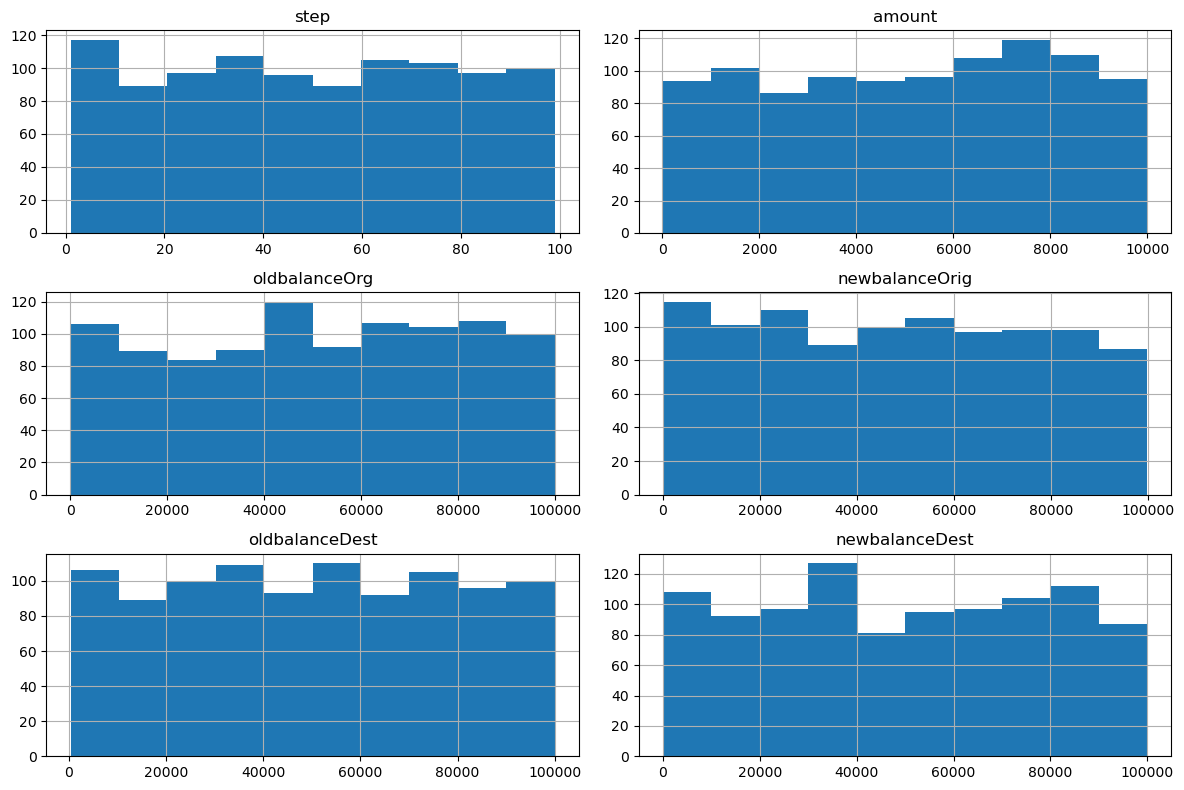

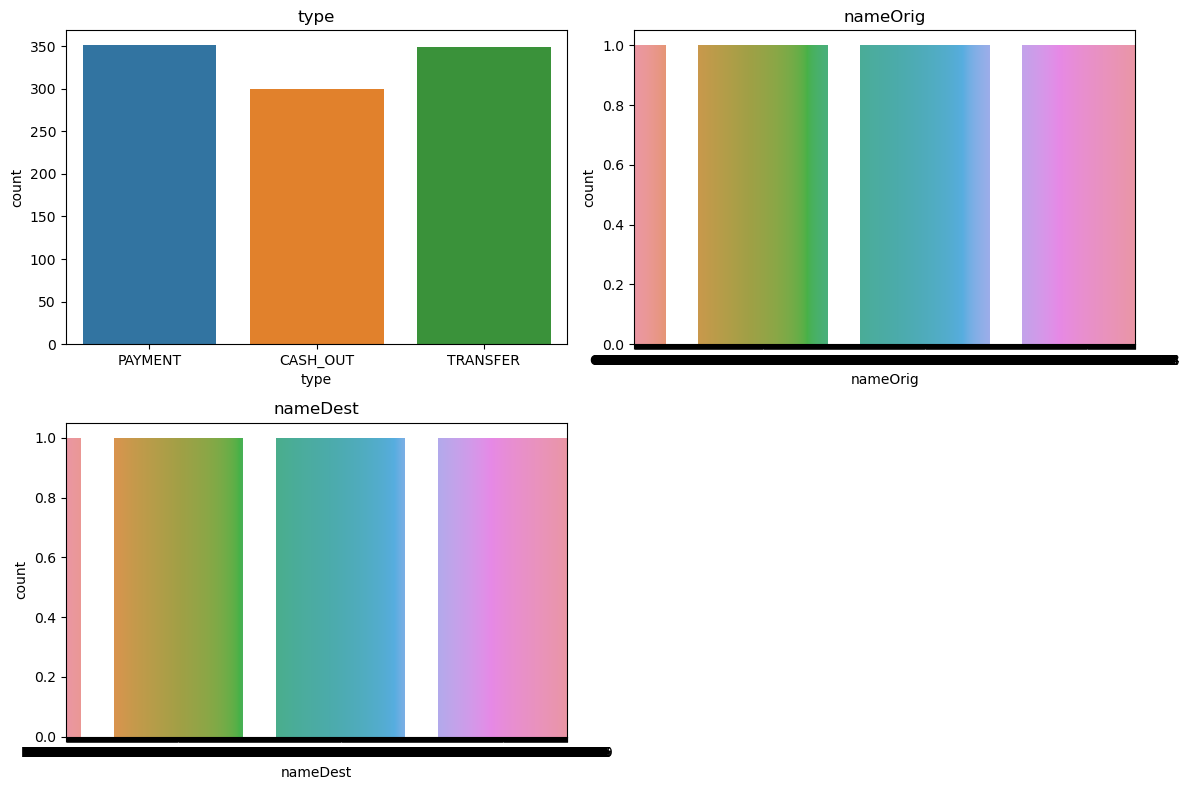

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of numerical features
data[numerical_features].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Countplots of categorical features
# Countplots of categorical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

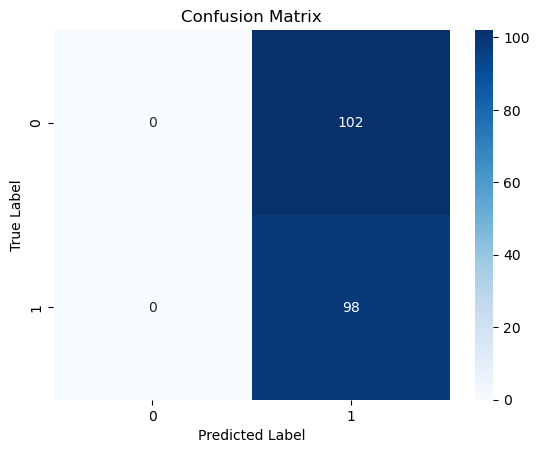

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# Preprocess data (e.g., scale numerical features, encode categorical variables)
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # or handle_unknown='value' with a specific value

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       102
           1       0.48      0.42      0.45        98

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



In [25]:
print(data.head())

   step      type       amount    nameOrig  oldbalanceOrg  newbalanceOrig  \
0    44   PAYMENT  4837.955916  C866879217   62771.589535    95972.983245   
1    61  CASH_OUT  9160.893875  C638936449   37216.927042    41664.578777   
2    64  TRANSFER  4083.310861  C803587817   80357.577083    32205.782981   
3    14  CASH_OUT  3047.669583  C791323091    2045.877178    42410.197745   
4    89   PAYMENT  5348.428224  C338214046   25961.240086    27249.047870   

     nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M194381488    96496.497301     8204.857709        0               0  
1  M863613708    29660.670387    38858.153736        0               1  
2  M929956394    59779.096145    38604.745138        1               1  
3  M730688743    17667.862467    77121.237247        1               1  
4  M755678915     8380.766536    15445.223320        0               0  


In [27]:
# Separate features and target variable
X = data.drop(columns=['isFraud', 'nameOrig', 'nameDest'])  # Exclude non-numeric columns and target variable
y = data['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data (e.g., scaling numerical features and one-hot encoding categorical features)
numeric_features = X.select_dtypes(include=['float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit preprocessing pipeline on training data
preprocessor.fit(X_train)

# Apply preprocessing pipeline to training and testing data
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_preprocessed, y_train, epochs=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_preprocessed, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10


20/20 [==============================] - 3s 44ms/step - loss: 0.7104 - accuracy: 0.4844 - val_loss: 0.6982 - val_accuracy: 0.5188
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6925 - accuracy: 0.5156 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6878 - accuracy: 0.5531 - val_loss: 0.6987 - val_accuracy: 0.4875
Epoch 4/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6837 - accuracy: 0.5672 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6813 - accuracy: 0.5828 - val_loss: 0.6968 - val_accuracy: 0.5188
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6783 - accuracy: 0.5813 - val_loss: 0.6959 - val_accuracy: 0.5125
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6754 - accuracy: 0.6047 - val_loss: 0.6969 - val_accuracy: 0.5250
Epoch 8/10
20/